#IST664 Lab 6 - Embeddings

**Credit**: Dr. Jeff Stanton and Dr. Preeti Jagadev

Embeddings are vector space representations of linguistic constructs. Starting with word2vec, researchers have used deep learning models to generate embedding vectors that represent the semantics of words and larger elements.

In this lab, we will practice using word and sentence embeddings in a variety of ways: In the first part of the lab, we will use a "large" **spaCy model** that contains context-free word embeddings. Context-free means that the vector is static, regardless of what word sense we are using. Note that the first code cell below may take a couple minutes to load, so you may want to set it running before you take a break.

In the second part of the lab we will use a **Sentence Embedding Model** obtained from huggingface.co and perform a parallel set of analyses using those sentence summary vectors.

With words it is possible to develop a fairly comprehensive dictionary of vector representations with 100,000 entries or perhaps more. With sentences, however, there are just too many possibilities to be able to represent each one with a stored vector.

The alternative strategy used by deep learning summarizer models is to process any given input sentence through a complete, pre-trained model. This processing step is sometimes referred to as "inference," as it is conceptually similar to using a trained predictive model on novel data. After processing a sentence, we can extract a vector representation from the internal state of the model.

# Section 6.1

In [1]:
# Load a large spaCy model to get the word embeddings included with spaCy.
# Note that this may take two or three minutes.
import spacy
import spacy.cli # Use the command line interface
spacy.cli.download("en_core_web_lg") # This imports the large model onto your virtual machine
import en_core_web_lg # Now that it is downloaded, we can import it
nlp_lg = en_core_web_lg.load() # Create an instance for further use
type(nlp_lg)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


spacy.lang.en.English

In [2]:
# Let's begin by processing one word and making sure it has an embedding vector
my_word = "natural"
natural = nlp_lg(my_word)
type(natural), natural[0].has_vector

(spacy.tokens.doc.Doc, True)

In [3]:
# Remember that a "doc" is a list-like object where each element is a token.
# So we can use slicing to get access to the one and only token in this doc.
len(natural[0].vector) # Shows the dimensionality of spaCy vector space representations

300

(array([  1.,   2.,  12.,  92., 133.,  52.,   6.,   0.,   0.,   2.]),
 array([-1.7773    , -1.36461997, -0.95194   , -0.53926003, -0.12658   ,
         0.28610003,  0.69877994,  1.11146009,  1.52414   ,  1.93681991,
         2.34949994]),
 <BarContainer object of 10 artists>)

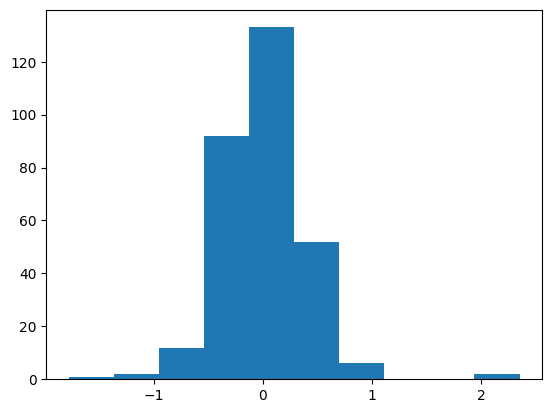

In [4]:
# Get a flavor for the distribution of the elements of the vector. The mean of
# the vector elements is typically near zero. The SD of this distribution is about 2.5.
import matplotlib.pyplot as plt
plt.hist(natural[0].vector)

In [5]:
# The vectors are kept in spaCy's vocabulary store which can also be accessed directly as follows:
direct = nlp_lg.vocab[my_word].vector

len(direct)

300

In [6]:
# Note the vector math inside of this expression. The sum() function then adds together all of the differences.
sum(direct - natural[0].vector) # Quick test of identity:
# A sum of zero means that the two vectors are likely to be identical

np.float32(0.0)

In [7]:
# Another way of testing the equality of two vectors is to use the all() method
(direct == natural[0].vector).all()

np.True_

In [8]:
# Make up a word that does not exist in English and try to access spaCy's vocabulary store with that word. What happens?
my_non_word = "nitarul"
direct2 = nlp_lg.vocab[my_non_word].vector

direct2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
# SpaCy has a method for finding similar words. This is a standard kind of
# function in a word embedding package, available in word2vec and other embedding code libraries.
# The underlying code may use hashing tricks to speed up the search through the vocabulary.
import numpy as np

similar = nlp_lg.vocab.vectors.most_similar(np.asarray([direct]), n=10)
word_list = [nlp_lg.vocab.strings[w] for w in similar[0][0]]
print(word_list)

['NATURAL', 'NATURALLY', 'NATURE', 'ALL-NATURAL', 'BEAUTY', 'ORGANIC', 'MINERAL', 'ARTIFICIAL', 'MINERALS', 'PURE']


In [10]:
type(similar), len(similar) # What is the similar object?

(tuple, 3)

**Important note:** The **most_similar()** method called above returns a tuple with three elements. Each of the elements is a list and each of the lists contains ten items. The next three code cells explore the contents of these lists.

In [11]:
# similar[0] contains the ID "key" numbers of the 10 similar words from spaCy's vocabulary store.
# Keep in mind that it is possible that two or more words/keys may point to the same vector.
type(similar[0]), similar[0] # There should be ten ids/keys

(numpy.ndarray,
 array([[ 3289870990949853296,   684312226192174600, 10223243594700101736,
         16706442045351170203, 10351445379793076205, 18419681968448253356,
         15094898764795656169,  1174250200168594916,  6763376550894349123,
          1161826245155300182]], dtype=uint64))

In [12]:
# similar[1] contains the "best rows" from the vector table providing a faster way to lookup the corresponding vectors if necessary.
type(similar[1]), similar[1] # There should be ten row indices

(numpy.ndarray,
 array([[ 32188,  26899,  55177,  14264, 196750,  10573,  76776,   7399,
          13154,  10034]], dtype=int32))

In [13]:
# similar[2] contains the cosine similarity scores between the reference word and the top 10 words that spaCy found.
# Note how the first entry (the word "natural") has similarity equal to one.
type(similar[2]), similar[2] # There should be ten cosine similarity scores

(numpy.ndarray,
 array([[1.    , 0.7196, 0.6515, 0.6249, 0.5934, 0.5792, 0.5641, 0.5517,
         0.5512, 0.5434]], dtype=float32))

In [14]:
# Possibly helpful for the next exercise, numpy's argmax function returns the POSITION within a list of the maximum value in the list.
# Here's a demo:
np.argmax([4,3,3,3,3])

np.int64(0)

In [15]:
# Question 6.1:
# Write a loop that use the similarity scores from similar[2],
# first to eliminate instances of the same word (i.e., where similarity equals one) from the list and then,
# second, to print the word with the maximum similarity score among the remaining values.

# This might help: It extracts each piece of the similarity tuple as a non-nested list
key, row, sim = similar[0].tolist()[0], similar[1].tolist()[0], similar[2].tolist()[0]
# So "sim" now contains a list of the similarity scores

# Hint: Start by looping through "sim" to modify each value of 1 into a value of 0.
# This will "blank out" the word(s) that are identical to the original probe word.

for i in range(len(sim)):
    if sim[i] == 1:
        sim[i] = 0
if sim:  
    max_score = max(sim)
    if max_score > 0:
        max_index = sim.index(max_score)
        word_with_max_sim = row[max_index]
        print(f"The word with the maximum similarity score (excluding the original word) is: '{word_with_max_sim}' with a score of {max_score}")
    else:
        print("All remaining similarity scores were 0 or negative.")
else:
    print("The similarity list is empty.")

The word with the maximum similarity score (excluding the original word) is: '26899' with a score of 0.7196000218391418


Now that we know how to access spaCy's word vector data, let's try a couple of semantic tests to see how the vectors perform.

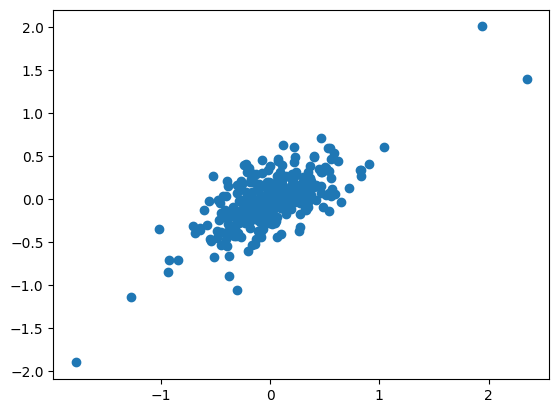

In [16]:
# Now let's examine what happens with vectors when we make a syntactic transformation from adjective to adverb.
import matplotlib.pyplot as plt

# Remember this code from above that gets the vector for "natural": direct = nlp_lg.vocab[my_word].vector

naturally = nlp_lg.vocab["naturally"].vector # Look up the vector for the adverbial form

plt.scatter(direct, naturally)

**Question 6.2**

a. What do the X and Y axes represent in that scatterplot? X is the vector components for natural and Y for naturally

b. Why does that scatterplot have the shape that it does? It has this shape becuase the words are relatively similar with positive correlation though most points are clustered in the middle

Some statisticians would say that the plot has a "cigar shape" and that this shape provides an important clue about the correlation between the two variables.

c. Do you think the two variables are correlated? Yes they are correlated although not strongly

d. What does that imply about the word "natural" and the word "naturally?" This implies that these words have similar means since one is the adverb of form of an adjective, but also that can have very different meanings as well.

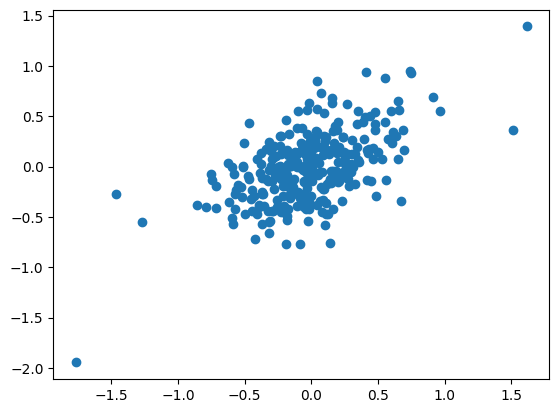

In [17]:
# Question 6.3:
# Choose a different adjective, such as "powerful", as well as its adverbial form.
# Obtain the two word vectors as shown earlier and plot the two vectors as a scattergram.
# Are there any parallels to the chart above?

# Solution
direct3 = nlp_lg.vocab["powerful"].vector
direct4 = nlp_lg.vocab["powerfully"].vector

plt.scatter(direct3, direct4)



Just as NLPIA says, we don't really know what each element of a vector actually signifies semantically. But that does not stop us from working with these vectors to explore semantics. In this next exercise, we use Kmeans clustering, a simple geometric technique for allocating points to clusters. Each cluster ends up being represented by a center point (a centroid), which in this case will be in d=300 space. So if we had a cluster that contained the word vectors for "milk," "cheese," and "yogurt," the centroid would look like a word vector but would not represent a particular word, but rather a dairy-product middle position in between "milk," "cheese," and "yogurt." We can treat a centroid as if it were a word vector by finding words that are similar to it.

In [18]:
# Next, let's get the word vectors for a variety of adjectives and cluster them.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2) # Let's get a two cluster solution

adjectives = nlp_lg("big gigantic massive long tall spicy bitter sour tart zesty")

vect_list = [tok.vector for tok in adjectives]

km.fit(vect_list)

clusters = km.cluster_centers_
len(clusters[0]) # cluster[0] is the vector representing the first cluster center

300

(array([  1.,   0.,   1.,   1.,  73., 206.,  16.,   1.,   0.,   1.]),
 array([-2.16941671, -1.76027003, -1.35112336, -0.94197669, -0.53283002,
        -0.12368334,  0.28546333,  0.69461   ,  1.10375667,  1.51290335,
         1.92205002]),
 <BarContainer object of 10 artists>)

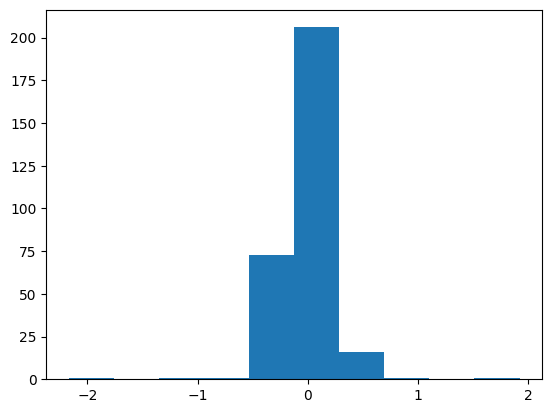

In [19]:
plt.hist(clusters[0])
# This suggests that the cluster center is a typical-looking embedding vector even though it is not a real word
# but rather a position in d=300 space determined by km.fit().

Each of the two cluster centers represents a point in d=300 space that is in the geometric "middle" of all of the word vectors that Kmeans assigned to each cluster. But the cluster center is not itself a vector for a particular word.

So how can we find out what each cluster center is all about?

**You guessed it**: We do a similarity search, with spaCy's help, to find out which words are closest to each cluster center.

In [20]:
# Question 6.4:
# Find the nearest 10 words to each of the two cluster centers
# Here's the relevant code from up above for obtaining a list of similar words.
# What is the one argument you need to change?

similar = nlp_lg.vocab.vectors.most_similar(np.asarray([direct3]), n=10)
[nlp_lg.vocab.strings[w] for w in similar[0][0]]

# Solution

['POWERFUL',
 'Powerfull',
 'POTENT',
 'STRONG',
 'POWER',
 'POWERFULLY',
 'EXTREMELY',
 'INCREDIBLY',
 'EFFECTIVE',
 'CAPABLE']

In [21]:
# Here are two sentences from Wikipedia:
two_sentences = "Shanghai Tower is the world's third-tallest building by height to architectural top and it shares the record of having the world's highest observation deck within a building or structure. In 2007, Guinness World Records certified that the ghost pepper was the world's hottest chili pepper, 170 times hotter than Tabasco sauce. "
# Scroll right to see the second sentence.

# Question 6.5:
# Use spaCy to tokenize "two_sentences: and then remove stop words, numbers and punctuation from the token stream.
# Obtain a list of word vectors of the remaining words and subject this list to a two cluster Kmeans analysis.
# Find the closest 10 words to each of the resulting cluster centers.

# Solution
import spacy
nlp = spacy.load("en_core_web_lg") 
type(nlp)

doc = nlp(two_sentences) 

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
clean_toks = [token for token in doc if not token.is_stop and not token.is_punct and token.is_alpha and token.has_vector]


In [22]:
clean_toks_vectors = [token.vector for token in clean_toks]
centroid = np.mean(clean_toks_vectors, axis=0)
similar = nlp_lg.vocab.vectors.most_similar(np.asarray([centroid]), n=10)

[nlp_lg.vocab.strings[w] for w in similar[0][0]]


['worLd',
 'OnE',
 'EVen',
 'PLACE',
 'EVER',
 'THere',
 'WHOLE',
 'İt',
 'WHERe',
 'WEll']

There's more to do with word embedding vectors. In particular, there are basic ways to summarize short utterances by computing the mean vector across all the words in the utterance. Some applications perform dimension reduction on a set of word vectors to get a low-dimensional representation of certain linguistic characteristics such as the tense of verbs or the gender of nouns.

Despite the usefulness of word vectors, however, the subsequent development of more complex deep learning models opened up the possibility of creating vector representations of phrases, sentences, and longer constructions. To some degree, these models have supplanted the use of word vectors, because they provide greater flexibility and because we are usually interested in analyzing whole utterances rather than isaolated words. The rest of the lab focuses on these sentence embeddings.


## Section 6.2: Sentence Embeddings

In this section of the lab, we will load up a **pre-trained model** that can produce sentence embeddings.

With word vectors we could maintain a list of 10k, 100k, or more words in a dictionary. That's not feasible with sentences, though, because language is so expressive: there's effectively an infinite number of possible sentences.

As a result, to create a sentence embedding we need a trained model to perform "inference" on an input that we provide, usually in the form of a string containing a complete sentence. Sentence embedding models process the input string through a system of weights to create a long vector that tries to capture the semantics of the whole sentence.


In [ ]:
# The first thing we will need is the library for loading sentence transformers
# This generates a lot of output, but should run pretty fast.

# pip install sentence-transformers


SyntaxError: invalid syntax (1820965070.py, line 4)

In [ ]:
# pip install tf-keras


In [25]:
# Now load a pre-trained sentence transformer onto this VM. There are hundreds of models to choose from.
# The model loading process downloads a lot of data to your virtual machine and takes half a minute or so.
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Black Knight\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violatio

In [26]:
# Let's get the vector for one example sentence:
one_sentence = "Shanghai Tower is the world's third-tallest building by height to architectural top and it shares the record of having the world's highest observation deck within a building or structure."

a = model.encode([one_sentence])
print(a.shape) # Show the shape of the vector: Take note of the dimensionality

(1, 512)


Using a multilingual model can be a good idea if you need to work with multiple languages, have limited resources, or want to enable cross-lingual transfer or analysis. However, it's important to note that multilingual models may not always perform as well as language-specific models for a particular language, so it's important to evaluate their performance on your specific task and data.

In [27]:
# Here's another sentence that looks cloesely related.
another_sentence = "Shanghai Tower is a 128-story, 632-meter-tall megatall skyscraper in Lujiazui, Pudong, Shanghai that is the world's third-tallest building by height and having the world's highest observation deck at 562 m."

# Question 6.6: Compute a summary vector for "another_sentence". Show the shape.

# Solution
doc_another = nlp_lg(another_sentence)
summary_vector = doc_another.vector
print(f"The shape of the summary vector is: {summary_vector.shape}")

The shape of the summary vector is: (300,)


In [28]:
# Question 6.7:
# Compute the cosine similarity between one_sentence and another_sentence.
# You can use cosine_similarity()from sklearn.metrics.pairwise

from sklearn.metrics.pairwise import cosine_similarity

# Solution
vector_one = nlp_lg(one_sentence).vector
vector_another = nlp_lg(another_sentence).vector

vector_one_2d = vector_one.reshape(1, -1)
vector_another_2d = vector_another.reshape(1, -1)

similarity_score = cosine_similarity(vector_one_2d, vector_another_2d)
print(f"The Cosine Similarity between the two sentences is: {similarity_score[0][0]:.2f}")

The Cosine Similarity between the two sentences is: 0.93


In [29]:
# Question 6.8:
# Copy and paste a sentence from Wikipedia or another source that is on a topic other than Shanghai Tower.
# Create a sentence vector for it.

third_sentence = "Myles Garrett currently has more sacks than 3 teams"

# Solution
vector_3 = nlp_lg(third_sentence).vector


In [30]:
# Question 6.9:
# Compute cosine similarity between third_sentence and each of the other two sentences.

# Solution
vector_3_2d = vector_3.reshape(1, -1)

similarity_score13 = cosine_similarity(vector_one_2d, vector_3_2d)
print(f"The Cosine Similarity between sentence 1 and 3 is: {similarity_score13[0][0]:.2f}")

similarity_score23 = cosine_similarity(vector_another_2d, vector_3_2d)
print(f"The Cosine Similarity between sentence 2 and 3 is: {similarity_score23[0][0]:.2f}")


The Cosine Similarity between sentence 1 and 3 is: 0.62
The Cosine Similarity between sentence 2 and 3 is: 0.58


At this point we have created d=512 vector representations of several sentences and used cosine similarity to compare them. Let's load a large dataset of sentences and use that to generate a set of sentence vectors so that we can try out some practical approaches to using the similarities of sentence vectors.

In [31]:
# ********* Load Data ********* #
# The following code processes the Twitter Emotion Corpus (TEC)
# Link of paper: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.383.3384&rep=rep1&type=pdf
# Link of web page with dataset: http://saifmohammad.com/WebPages/SentimentEmotionLabeledData.html


# These lines download the zip file to this VM and unzip it onto the disk
!wget http://saifmohammad.com/WebDocs/Jan9-2012-tweets-clean.txt.zip
!unzip Jan9-2012-tweets-clean.txt.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
import urllib.request
import zipfile
import os

url = "http://saifmohammad.com/WebDocs/Jan9-2012-tweets-clean.txt.zip"
zip_filename = "Jan9-2012-tweets-clean.txt.zip"
extract_dir = "." # Current directory

# Ensure the extract directory exists
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Define custom headers with a User-Agent string to avoid potential server blocks
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Create a Request object with the URL and headers
req = urllib.request.Request(url=url, headers=headers)

# Download the file
print(f"Downloading {url}...")
try:
    with urllib.request.urlopen(req) as response:
        with open(zip_filename, 'wb') as out_file:
            out_file.write(response.read())
    print(f"Downloaded to {zip_filename}")

    # Extract the contents
    print(f"Extracting {zip_filename} to {extract_dir}...")
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        # This extracts all files in the zip to the specified directory
        zip_ref.extractall(extract_dir)
    print("Extraction complete.")
    
    # Optional: Clean up the downloaded zip file after extraction
    # os.remove(zip_filename)
    # print(f"Removed temporary file {zip_filename}")

except Exception as e:
    print(f"An error occurred: {e}")



Downloaded to Jan9-2012-tweets-clean.txt.zip
Extracting Jan9-2012-tweets-clean.txt.zip to ....
Extraction complete.


In [33]:
# Now read and process the data file
basefile = "Jan9-2012-tweets-clean.txt" # Should match the name of the unzipped file

# Initialize a list of tweets
texts = []

# Initialize a list of labels
labels = []

with open(basefile, 'r', encoding="utf8") as f:
  for line in f:
    splitted = line.strip().split()
    labels.append(splitted[len(splitted)-1])
    texts.append(' '.join(splitted[1:len(splitted)-2]))

print('Loaded %s sentences.' % len(labels))

Loaded 21051 sentences.


In [34]:
# Question 6.10:
# The texts of the tweets are in the list "texts". Examine the first 10 tweets.

# Solution
texts[0:10]

['Thinks that @melbahughes had a great 50th birthday party :)',
 'Como una expresión tan simple, una sola oración, puede llegara dañarte tanto.',
 'the moment when you get another follower and you cheer.',
 'Be the greatest dancer of your life! practice daily positive habits. #fun #freedom #habits',
 'eww.. my moms starting to make her annual rum cake for the whole ramdyal/ally family. fml fml fml the smelll.......',
 "If ur heart hurts all the time for tht person something isn't right where's the",
 "I feel awful, and it's way too freaking early. Now off to leadership highschool...",
 'So chuffed for safc fans! Bet me dar comes in mortz from the match',
 'Making art and viewing art are different at their core!',
 'Soooo dooowwwn!! Move on, get some sleep... Me deserve better. #forgetit #yawning']

In [35]:
len(texts)

21051

In [36]:
# When initially developing some new code it is better to work on a smaller chunk to get the bugs out
# without a huge amount of processing time.
# So let's take 500 of the 21051 tweets. Feel free to process more of the tweets once you have finished the rest of the lab.
short_list = texts[500:1000]
len(short_list)

500

In [37]:
# We can run model.encode() on a list of texts. This will take 30-60 seconds for a list of 500 tweets.
tweet_vects = model.encode(short_list)
tweet_vects.shape # Make sure you know what these numbers mean

(500, 512)

In [38]:
# Now let's see if we can find all the tweets that pertain to a particular topic.
# Here's an "anchor sentence" that we can use to generate similarities.
anchor = 149
short_list[anchor]

'Curling my hair, actually looks good.'

<BarContainer object of 512 artists>

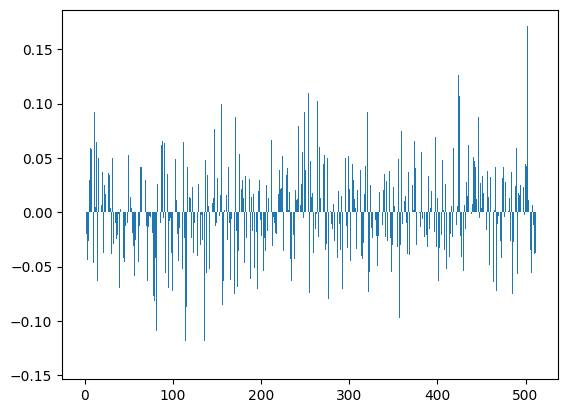

In [39]:
# Note how these vector elements appear on a very different scale from spaCy word vectors.
# Still centered on zero but with a much smaller SD.
# This is a result of using different computational techniques to generate the vectors.
plt.bar(x=range(512), height=tweet_vects[anchor])

In [40]:
# Compute similarity scores between each sentence and the anchor sentence
sim_list = []

for vect in tweet_vects:
  sim_list.append(cosine_similarity(tweet_vects[anchor].reshape(1,-1), vect.reshape(1,-1)))

len(sim_list), type(sim_list[0])

(500, numpy.ndarray)

(array([122., 255., 105.,  11.,   4.,   2.,   0.,   0.,   0.,   1.]),
 array([-0.07649349,  0.03115586,  0.13880521,  0.24645456,  0.35410391,
         0.46175326,  0.56940261,  0.67705195,  0.7847013 ,  0.89235065,
         1.        ]),
 <BarContainer object of 10 artists>)

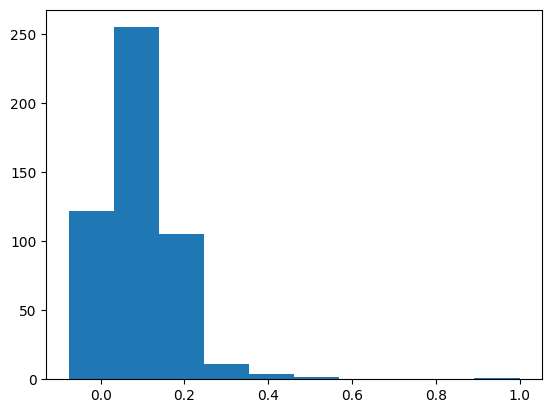

In [41]:
# Show a histogram of the similarity values
plt.hist([sim.tolist()[0][0] for sim in sim_list])

In [42]:
# Now show all of the sentences with a similarity greater than 0.5
thresh = 0.5

for i, sim in enumerate(sim_list):
  if sim.tolist()[0][0] > thresh:
    print(short_list[i])

I never noticed how long my hair is when is curly :o
Curling my hair, actually looks good.


In [43]:
# Question 6.11:
# Write your own anchor sentence that you think might match some tweets.
# Generate a vector representation of that sentence and use the vector to create a similarity list across the 500 tweets.
# Inspect a histogram to get a good cutoff value and display all of the tweets that are similar to your anchor sentence.

# Solution
anchor = "College football kickoff is the offical end of summer break"
vector_3 = model.encode(anchor)

sim_list = []

for vect in tweet_vects:
  sim_list.append(cosine_similarity(vector_3.reshape(1,-1), vect.reshape(1,-1)))

len(sim_list), type(sim_list[0])

(500, numpy.ndarray)

(array([  8.,  45., 110., 157.,  93.,  39.,  28.,  12.,   4.,   4.]),
 array([-0.07034966, -0.02422669,  0.02189627,  0.06801923,  0.11414219,
         0.16026515,  0.20638811,  0.25251107,  0.29863404,  0.344757  ,
         0.39087996]),
 <BarContainer object of 10 artists>)

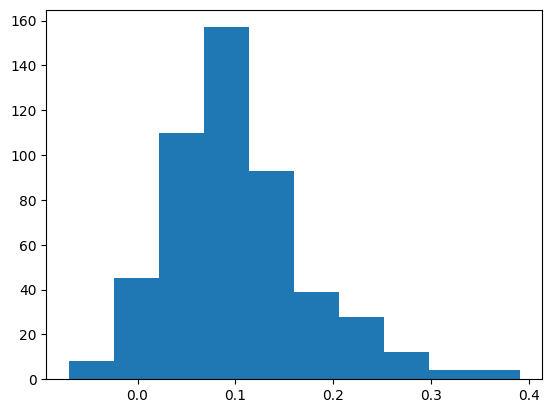

In [44]:
plt.hist([sim.tolist()[0][0] for sim in sim_list])


In [45]:
# Now show all of the sentences with a similarity greater than 0.5
thresh = 0.3

for i, sim in enumerate(sim_list):
  if sim.tolist()[0][0] > thresh:
    print(short_list[i])

@KenzzMarie Yayayayay let's go JETS can't wait for the game! You're gonna love the stadium. Biggest in NFL #lovemymama
Heb tenslotte nog tot zondag om mijn af te maken #Sinterklaas
School is very boring today :/
Watching some 7th grade basketball allllll day!
Workout, check! Play volleyball, check! Now, time to write 2 essays by tomorrow... #gottagetmotivated
I have to make up nine assignments by Friday, I have terrible grades in all of my classes, and I'm going to fail all of my finals.
Zoo gedichtje uitgeprint. Nu surprise puntjes op de i .. en klaar voor morgen :) #voetbalvrouwuh
@TheBodyShopUK Knowing I take a relaxing break from school work and going in on a Saturday morning to school brings me :D


C:\Users\Black Knight\AppData\Local\Temp\ipykernel_9008\2431210456.py:14: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_matrix = linkage(dist, "weighted") # Create the hierarchy


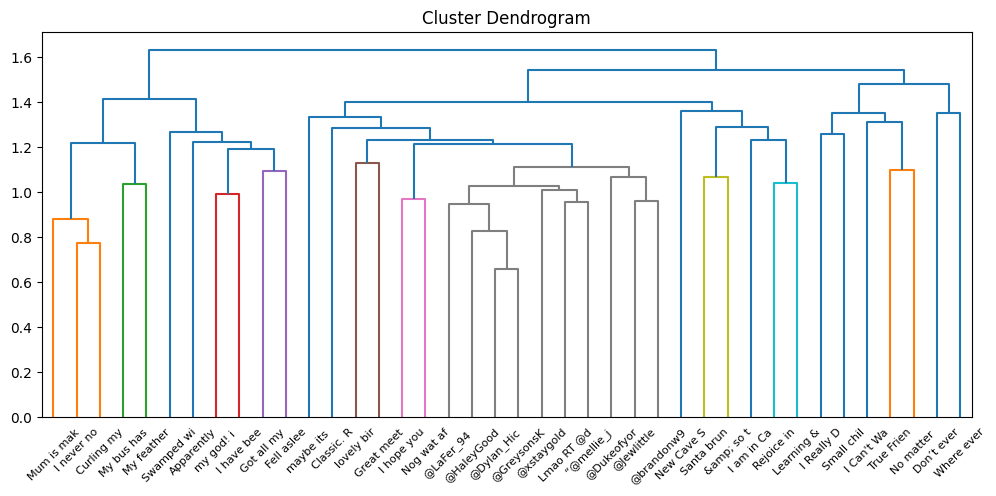

In [46]:
from sklearn.metrics.pairwise import cosine_distances # To create distance matrix for clustering
from scipy.cluster.hierarchy import dendrogram, linkage # For clustering

start_tweet = 110 # Pick any starting and ending point you like.
end_tweet = 150   # but a dendrogram can only show so much.

smaller_set = tweet_vects[start_tweet:end_tweet] # Subset the vectors
small_labels = [s[0:10] for s in short_list[start_tweet:end_tweet]] # Make some leaf labels

# In this next step, we compute a square cosine distance matrix using the vectors
dist = cosine_distances(smaller_set, smaller_set)

fig = plt.figure(figsize=(12, 5)) # Make a larger figure area
link_matrix = linkage(dist, "weighted") # Create the hierarchy
dendrogram(link_matrix, leaf_font_size=8., labels=small_labels) # Plot the result
plt.title("Cluster Dendrogram")
plt.show()

Dendrograms have the advantage that they are easy to explain to non-technical audiences. The larger and smaller distances among elements in the set are easy to spot visually.

The disadvantage is that there is no clear assignment of an element to a cluster and there's no clear idea of how many clusters are needed to have a good fit. How many clusters do you think are represented by the dendrogram above?

The other disadvantage of a dendrogram is that even with a really large display, you can only fit a small set of elements onto it. The dendrogram above shows 40 elements and much more than that would make for a lot of clutter.

In the next exercise, you will use t-distributed stochastic neighbor embedding (t-SNE), a data reduction technique to project high dimensional spaces onto low dimensional spaces. Rather than computing the distances in advance, we will tell the TSNE() function what distance metric we would like it to use.  

In [47]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=4, method="exact", metric="cosine", init='pca', max_iter=2500, random_state=42, perplexity=20, early_exaggeration=10)

In [48]:
# This can take about one minute to complete for 500 points.
# Note that we are passing in the complete list of sentence summary vectors and the procedure is calculating a cosine distance matrix
# from that list before using TSNE for dimension reduction.
tsne_out = tsne_model.fit_transform(tweet_vects) # May throw some warnings.

In [49]:
# Question 6.12:
# Display the shape of the tsne_out object.
# Why does this shape make sense? What is stored in the object?
# This shape makes sense because it is the number of tweets in the tweet_vects which was 500 and the number of components/ target dimensionality which was 4
# In the object is the embedding of the data in tweet_vects

# Solution
print(tsne_out.shape)

(500, 4)


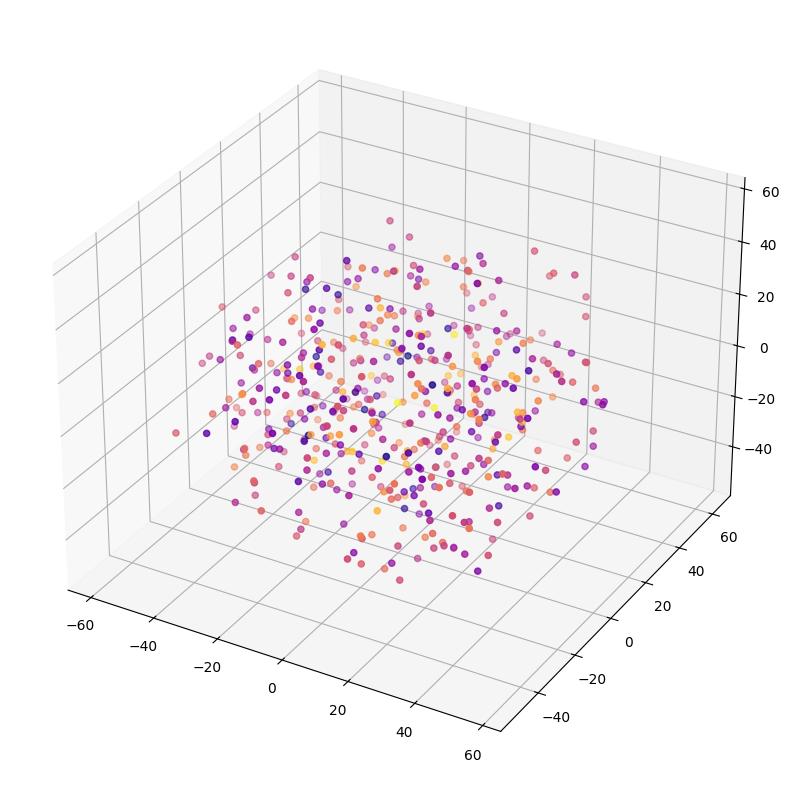

In [50]:
# This creates a 3D plot with the color of the points controlled by the 4th dimension
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=tsne_out[:,0], ys=tsne_out[:,1], zs=tsne_out[:,2], c=tsne_out[:,3], cmap="plasma")

**Question 6.13:**

Use this text block to write an interpretation of the 3D plot above.
a. Are there any notable patterns evident?

b. Are there any "special" points we should be paying attention to?

**Your answer here:**
There doesnt appear to be any clustering of the tweets which means the tweets used are truly random. 


In [51]:
# Question 6.14:
# Adjust the perplexity and early_exaggeration parameters that control the TSNE fitting process.
# Adjust them one at a time and look for how they affect the shape of the plot.
# Examine the sklearn documentation for TSNE and comment on the ideal parameters for plotting.
# How would you go about locating the outlier tweets that appear on the plot?

# The ideals parameters for perplexity and early_exaggeration fro plotting is 5 to 50 and 1 to 100 respectively
# I would locate outlier tweets by visualizing any points in the plot that are far from the rest of the data and then try to filter them to locate

# Solution
tsne_model1 = TSNE(n_components=4, method="exact", metric="cosine", init='pca', max_iter=2500, random_state=42, perplexity=10, early_exaggeration=20)
tsne_model2 = TSNE(n_components=4, method="exact", metric="cosine", init='pca', max_iter=2500, random_state=42, perplexity=40, early_exaggeration=50)

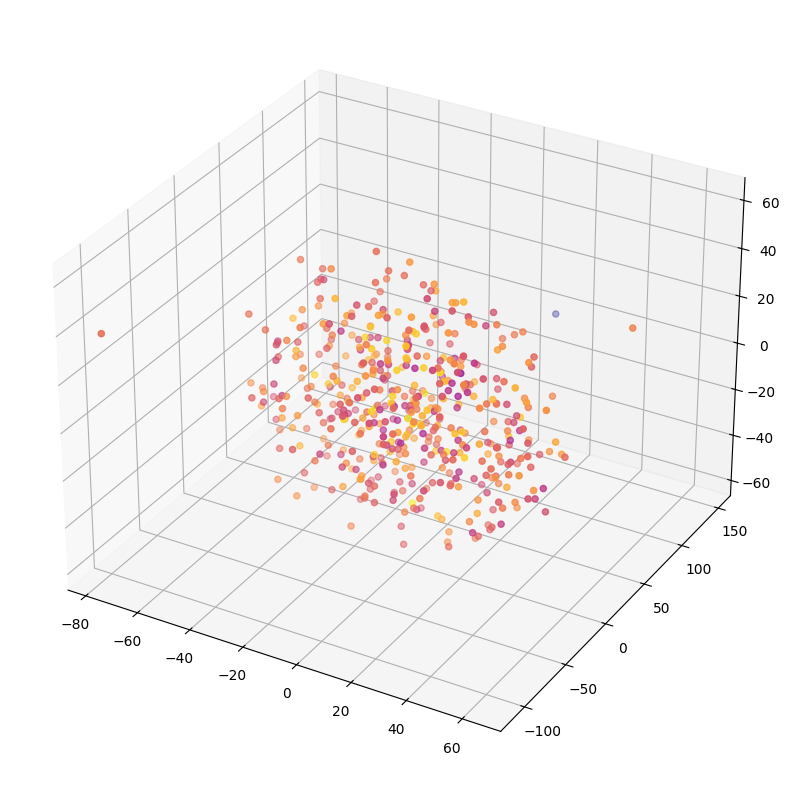

In [52]:
tsne_out = tsne_model1.fit_transform(tweet_vects) # May throw some warnings.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=tsne_out[:,0], ys=tsne_out[:,1], zs=tsne_out[:,2], c=tsne_out[:,3], cmap="plasma")

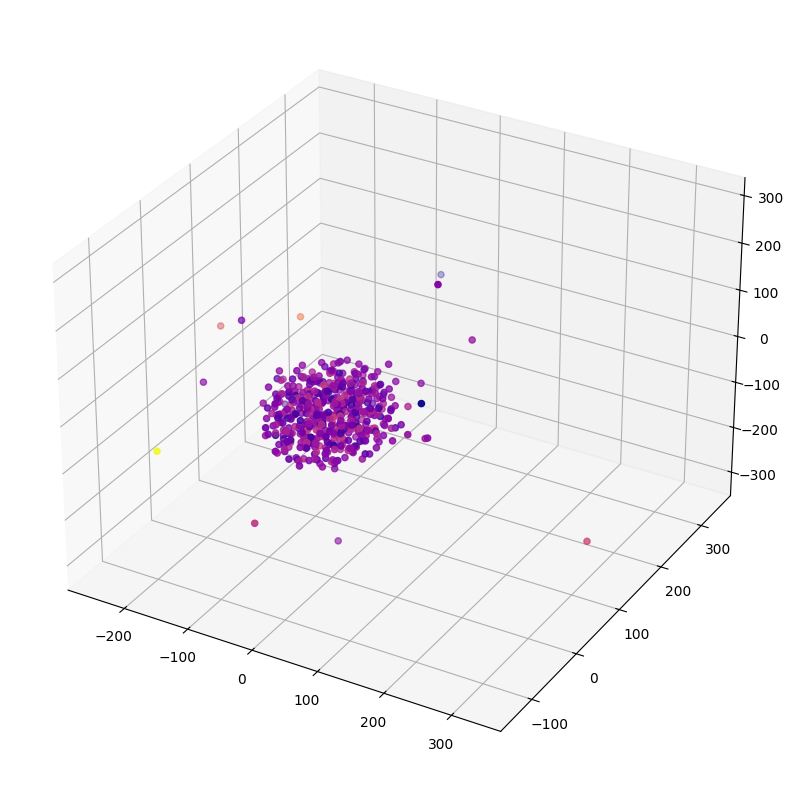

In [53]:
tsne_out = tsne_model2.fit_transform(tweet_vects) # May throw some warnings.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=tsne_out[:,0], ys=tsne_out[:,1], zs=tsne_out[:,2], c=tsne_out[:,3], cmap="plasma")